# XGBoost - Predicting Airbnb Log Prices
MTHE457 Final Project - Kaggle - 
Oscar Brown - 2023 April 19

#### **Import all libraries**

In [188]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
import xgboost as xgb 
from xgboost import XGBClassifier
from xgboost import cv
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score, balanced_accuracy_score, roc_auc_score, make_scorer, mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [189]:
%matplotlib widget 
warnings.filterwarnings('ignore')

#### **Import dataset**

In [208]:
raw_train_data = '/Users/oscar/Desktop/MTHE 457/Final Project/w24-457857-project/train.csv'
raw_test_data = '/Users/oscar/Desktop/MTHE 457/Final Project/w24-457857-project/test.csv'
train_data = pd.read_csv(raw_train_data)
test_data = pd.read_csv(raw_test_data)

# full data set
raw_full_data = '/Users/oscar/Desktop/MTHE 457/Final Project/Airbnb_Data.csv'
full_data = pd.read_csv(raw_full_data)

numerical_placeholder = 8008135
string_placeholder = "missing"
full_data['bathrooms'] = full_data['bathrooms'].fillna(numerical_placeholder)
full_data['first_review'] = full_data['first_review'].fillna(string_placeholder)
full_data['host_has_profile_pic'] = full_data['host_has_profile_pic'].fillna(string_placeholder)
full_data['host_identity_verified'] = full_data['host_identity_verified'].fillna(string_placeholder)
full_data['host_response_rate'] = full_data['host_response_rate'].fillna(string_placeholder)
full_data['host_since'] = full_data['host_since'].fillna(string_placeholder)
full_data['last_review'] = full_data['last_review'].fillna(string_placeholder)
full_data['neighbourhood'] = full_data['neighbourhood'].fillna(string_placeholder)
full_data['review_scores_rating'] = full_data['review_scores_rating'].fillna(numerical_placeholder)
full_data['zipcode'] = full_data['zipcode'].fillna(string_placeholder)
full_data['bedrooms'] = full_data['bedrooms'].fillna(numerical_placeholder)
full_data['beds'] = full_data['beds'].fillna(numerical_placeholder)

# consider dropping id column
x_full = full_data.drop(['log_price', 'thumbnail_url'], axis = 1)
y_full = full_data['log_price']
x_train_full, x_test_full, y_train_full, y_test_full = train_test_split(x_full, y_full, test_size = 0.3, train_size = 0.7, random_state = 1, shuffle = False)

#### **Data analysis**

In [191]:
# train data
print('===== Submission/kaggle data =====')
print(train_data.shape)               # format
print(train_data.head(10))            # first 10 entries
print(train_data.info())              # characteristics
print(train_data.describe())          # summary
print(train_data.isnull().sum())      # check missing values

===== Submission/kaggle data =====
(52000, 28)
   log_price    property_type        room_type  \
0   4.605170            House     Private room   
1   3.871201        Apartment      Shared room   
2   5.783825        Apartment  Entire home/apt   
3   6.109248        Apartment  Entire home/apt   
4   4.356709            House     Private room   
5   5.010635             Loft  Entire home/apt   
6   5.293305      Condominium  Entire home/apt   
7   5.560682        Apartment  Entire home/apt   
8   3.806662  Bed & Breakfast     Private room   
9   5.703782        Apartment  Entire home/apt   

                                           amenities  accommodates  bathrooms  \
0  {"Cable TV",Internet,"Wireless Internet",Kitch...             2        1.0   
1  {TV,"Cable TV",Internet,"Wireless Internet","A...             1        1.0   
2  {TV,"Cable TV",Internet,"Wireless Internet","A...             6        1.5   
3  {TV,"Wireless Internet",Kitchen,Heating,"Famil...             6        1.0 

In [192]:
# test data
print(test_data.shape)                # format
print(test_data.head(10))             # first 10 entries
print(test_data.info())               # characteristics
print(test_data.describe())           # summary
print(test_data.isnull().sum())       # check missing values

(22111, 27)
  property_type        room_type  \
0     Apartment     Private room   
1         House     Private room   
2     Townhouse  Entire home/apt   
3     Apartment  Entire home/apt   
4     Apartment  Entire home/apt   
5     Apartment  Entire home/apt   
6         House     Private room   
7         House  Entire home/apt   
8     Apartment  Entire home/apt   
9     Apartment     Private room   

                                           amenities  accommodates  bathrooms  \
0  {TV,Internet,"Wireless Internet","Air conditio...             2        1.0   
1  {TV,"Cable TV","Wireless Internet","Air condit...             1        1.0   
2  {TV,"Cable TV",Internet,"Wireless Internet","A...            12        2.5   
3  {Internet,"Wireless Internet","Air conditionin...             3        1.0   
4  {TV,"Wireless Internet","Air conditioning",Kit...             2        1.0   
5  {TV,Internet,"Wireless Internet","Air conditio...             4        1.0   
6  {"Wireless Internet",

#### **Address missing entries**

In [193]:
# fill in missing entries with 'missing' for string columns, '8008135' for numerical columns
numerical_placeholder = 8008135
string_placeholder = "missing"

train_data['bathrooms'] = train_data['bathrooms'].fillna(numerical_placeholder)
train_data['first_review'] = train_data['first_review'].fillna(string_placeholder)
train_data['host_has_profile_pic'] = train_data['host_has_profile_pic'].fillna(string_placeholder)
train_data['host_identity_verified'] = train_data['host_identity_verified'].fillna(string_placeholder)
train_data['host_response_rate'] = train_data['host_response_rate'].fillna(string_placeholder)
train_data['host_since'] = train_data['host_since'].fillna(string_placeholder)
train_data['last_review'] = train_data['last_review'].fillna(string_placeholder)
train_data['neighbourhood'] = train_data['neighbourhood'].fillna(string_placeholder)
train_data['review_scores_rating'] = train_data['review_scores_rating'].fillna(numerical_placeholder)
train_data['zipcode'] = train_data['zipcode'].fillna(string_placeholder)
train_data['bedrooms'] = train_data['bedrooms'].fillna(numerical_placeholder)
train_data['beds'] = train_data['beds'].fillna(numerical_placeholder)

test_data['bathrooms'] = test_data['bathrooms'].fillna(numerical_placeholder)
test_data['first_review'] = test_data['first_review'].fillna(string_placeholder)
test_data['host_has_profile_pic'] = test_data['host_has_profile_pic'].fillna(string_placeholder)
test_data['host_identity_verified'] = test_data['host_identity_verified'].fillna(string_placeholder)
test_data['host_response_rate'] = test_data['host_response_rate'].fillna(string_placeholder)
test_data['host_since'] = test_data['host_since'].fillna(string_placeholder)
test_data['last_review'] = test_data['last_review'].fillna(string_placeholder)
test_data['neighbourhood'] = test_data['neighbourhood'].fillna(string_placeholder)
test_data['review_scores_rating'] = test_data['review_scores_rating'].fillna(numerical_placeholder)
test_data['zipcode'] = test_data['zipcode'].fillna(string_placeholder)
test_data['bedrooms'] = test_data['bedrooms'].fillna(numerical_placeholder)
test_data['beds'] = test_data['beds'].fillna(numerical_placeholder)

#### **Shuffle data**

In [194]:
train_data = shuffle(train_data)
test_data = shuffle(test_data)

#### **Declare dependent and independent variables**

In [195]:
# train data
x_train = train_data.drop(['log_price', 'ID'], axis = 1)
x_train_with_ID = train_data.drop(['log_price'], axis = 1)
y_train = train_data['log_price']

# test data
x_test = test_data.drop(['ID'], axis = 1)
x_test_with_ID = test_data


##### **Save identifiers**

In [196]:
# store uncorrelated identifiers to be restored to data set after fitting
ID_x_train = test_data['ID']
ID_y_train = test_data['ID']

ID_x_test = test_data['ID']
ID_y_test = train_data['ID']

#### **Transform data for XGBoost**

In [209]:
categorical_cols = ['property_type', 'room_type', 'amenities', 'bed_type', 'cancellation_policy', 'city', 'description', 'first_review', 'host_has_profile_pic', 'host_identity_verified', 'host_response_rate', 'host_since', 'instant_bookable', 'last_review', 'name', 'neighbourhood', 'zipcode']

for col in categorical_cols:
    x_train[col] = x_train[col].astype('category')
    x_test[col] = x_test[col].astype('category')
    x_train_full[col] = x_train_full[col].astype('category')
    x_test_full[col] = x_test_full[col].astype('category')

for col in categorical_cols:
    x_train[col] = x_train[col].cat.codes
    x_test[col] = x_test[col].cat.codes
    x_train_full[col] = x_train_full[col].cat.codes
    x_test_full[col] = x_test_full[col].cat.codes

train_dm = xgb.DMatrix(data = x_train, label = y_train, enable_categorical = True)

# full dataset
train_dm_full = xgb.DMatrix(data = x_train_full, label = y_train_full, enable_categorical = True)
test_dm_full = xgb.DMatrix(data = x_test_full, label = y_test_full, enable_categorical = True)

#### **Parameters**

In [198]:
# params for tree booster with categorical data, change for dart eventually
params = {
    'booster' : 'gbtree', 
    'device' : 'cpu',
    'verbosity' : 2, 
    'validate_parameters' : True,
    # 'nthread' : set to max by default,
    'disable_default_eval_metric' : False,
    
    'eta' : 0.3, 
    'gamma' : 100, 
    'max_depth' : 6, 
    'min_child_weight' : 1, 
    'max_delta_step' : 0, 
    'subsample' : 0.5, 
    'sampling_method' : 'uniform', 
    
    'colsample_by_tree' : 1, 
    'colsample_bylevel' : 1, 
    'colsample_bynode' : 1,
    
    'lambda' : 1, 
    'alpha' : 1,
    'tree_method' : 'exact', 
    'scale_pos_weights' : 1,
    # 'updater' : set automatically,
    # 'refresh leaf' : set automatically,
    # 'process_type' : set automatically,
    'grow_policy' : 'depthwise',
    'max_leaves' : 0, 
    'max_bin' : 256,
    'num_parallel_tree' : 1, 
    # 'monotone_constraints' : set automatically, 
    # 'interaction_constraints' : set automatically,
    
    # 'learning_rate' : 1.0,
    # 'n_estimators' : 1000,
    'objective' : 'reg:linear',

}

params_full = {
    'booster' : 'gbtree', 
    'device' : 'cpu',
    'verbosity' : 2, 
    'validate_parameters' : True,
    # 'nthread' : set to max by default,
    'disable_default_eval_metric' : False,
    
    'eta' : 0.3, 
    'gamma' : 100, 
    'max_depth' : 6, 
    'min_child_weight' : 1, 
    'max_delta_step' : 0, 
    'subsample' : 0.5, 
    'sampling_method' : 'uniform', 
    
    'colsample_by_tree' : 1, 
    'colsample_bylevel' : 1, 
    'colsample_bynode' : 1,
    
    'lambda' : 1, 
    'alpha' : 1,
    'tree_method' : 'exact', 
    'scale_pos_weights' : 1,
    # 'updater' : set automatically,
    # 'refresh leaf' : set automatically,
    # 'process_type' : set automatically,
    'grow_policy' : 'depthwise',
    'max_leaves' : 0, 
    'max_bin' : 256,
    'num_parallel_tree' : 1, 
    # 'monotone_constraints' : set automatically, 
    # 'interaction_constraints' : set automatically,
    
    # 'learning_rate' : 1.0,
    # 'n_estimators' : 1000,
    'objective' : 'reg:linear',
}

#### **Classifier**

In [199]:
xgb_reg_train = XGBRegressor(**params)
xgb_reg_train.fit(x_train, y_train)

# full dataset
xgb_reg_train_full = XGBRegressor(**params_full)
xgb_reg_train_full.fit(x_train_full, y_train_full)

[16:00:44] INFO: /Users/runner/work/xgboost/xgboost/src/tree/updater_prune.cc:80: tree pruning end, 18 extra nodes, 108 pruned nodes, max_depth=5
[16:00:44] INFO: /Users/runner/work/xgboost/xgboost/src/tree/updater_prune.cc:80: tree pruning end, 10 extra nodes, 114 pruned nodes, max_depth=3
[16:00:44] INFO: /Users/runner/work/xgboost/xgboost/src/tree/updater_prune.cc:80: tree pruning end, 10 extra nodes, 112 pruned nodes, max_depth=3
[16:00:44] INFO: /Users/runner/work/xgboost/xgboost/src/tree/updater_prune.cc:80: tree pruning end, 6 extra nodes, 118 pruned nodes, max_depth=3
[16:00:44] INFO: /Users/runner/work/xgboost/xgboost/src/tree/updater_prune.cc:80: tree pruning end, 8 extra nodes, 118 pruned nodes, max_depth=3
[16:00:44] INFO: /Users/runner/work/xgboost/xgboost/src/tree/updater_prune.cc:80: tree pruning end, 4 extra nodes, 120 pruned nodes, max_depth=2
[16:00:44] INFO: /Users/runner/work/xgboost/xgboost/src/tree/updater_prune.cc:80: tree pruning end, 6 extra nodes, 118 pruned n

XGBRegressor(alpha=1, base_score=None, booster='gbtree', callbacks=None,
             colsample_by_tree=1, colsample_bylevel=1, colsample_bynode=1,
             colsample_bytree=None, device='cpu',
             disable_default_eval_metric=False, early_stopping_rounds=None,
             enable_categorical=False, eta=0.3, eval_metric=None,
             feature_types=None, gamma=100, grow_policy='depthwise',
             importance_type=None, interaction_constraints=None, lambda=1,
             learning_rate=None, max_bin=256, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=0, max_depth=6,
             max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints=None, ...)

#### **Cross validation**

In [200]:
xgb_cv = cv(dtrain= train_dm, params=params, nfold=3,num_boost_round=50, early_stopping_rounds=10, metrics="logloss", as_pandas=True, seed=123)
xgb_cv.head()

grid = pd.DataFrame({'eta':[0.01,0.05,0.1]*2,
'subsample':np.repeat([0.1,0.3],3)})

def fit(x):
    xgb_cv = xgb.cv(dtrain=train_dm, params=params, 
    nfold=5, metrics = 'logloss',seed=42)
    return xgb_cv[-1:].values[0]

grid[['train-logloss-mean','train-logloss-std',
'test-logloss-mean','test-logloss-std']] = grid.apply(fit,axis=1,result_type='expand')

xgb_reg2 = xgb.XGBRegressor(**params)

xgb_reg2.fit(x_train, y_train)



[16:00:46] INFO: /Users/runner/work/xgboost/xgboost/src/tree/updater_prune.cc:80: tree pruning end, 12 extra nodes, 112 pruned nodes, max_depth=4
[16:00:46] INFO: /Users/runner/work/xgboost/xgboost/src/tree/updater_prune.cc:80: tree pruning end, 10 extra nodes, 112 pruned nodes, max_depth=3
[16:00:46] INFO: /Users/runner/work/xgboost/xgboost/src/tree/updater_prune.cc:80: tree pruning end, 12 extra nodes, 112 pruned nodes, max_depth=4
[16:00:46] INFO: /Users/runner/work/xgboost/xgboost/src/tree/updater_prune.cc:80: tree pruning end, 6 extra nodes, 118 pruned nodes, max_depth=3
[16:00:46] INFO: /Users/runner/work/xgboost/xgboost/src/tree/updater_prune.cc:80: tree pruning end, 6 extra nodes, 118 pruned nodes, max_depth=3
[16:00:46] INFO: /Users/runner/work/xgboost/xgboost/src/tree/updater_prune.cc:80: tree pruning end, 8 extra nodes, 118 pruned nodes, max_depth=3
[16:00:46] INFO: /Users/runner/work/xgboost/xgboost/src/tree/updater_prune.cc:80: tree pruning end, 4 extra nodes, 110 pruned n

XGBRegressor(alpha=1, base_score=None, booster='gbtree', callbacks=None,
             colsample_by_tree=1, colsample_bylevel=1, colsample_bynode=1,
             colsample_bytree=None, device='cpu',
             disable_default_eval_metric=False, early_stopping_rounds=None,
             enable_categorical=False, eta=0.3, eval_metric=None,
             feature_types=None, gamma=100, grow_policy='depthwise',
             importance_type=None, interaction_constraints=None, lambda=1,
             learning_rate=None, max_bin=256, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=0, max_depth=6,
             max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints=None, ...)

#### **Predictions**

In [201]:
y_pred_train = xgb_reg_train.predict(x_train)
y_pred_test = xgb_reg_train.predict(x_test)

y_pred_train2 = xgb_reg2.predict(x_train)
y_pred_test2 = xgb_reg2.predict(x_test)

print(y_pred_train)
print(y_pred_test)
mse = mean_squared_error(y_train, y_pred_train)

print(y_pred_train2)
print(y_pred_test2)
mse2 = mean_squared_error(y_train, y_pred_train2)

# Print the mean squared error
print('Mean Squared Error (MSE): {:.4f}'.format(mse))
print('Mean Squared Error (MSE): {:.4f}'.format(mse2))

[5.2534285 4.4924536 5.224569  ... 5.2021585 4.299581  4.5334673]
[5.2587614 5.6337805 4.2238812 ... 5.102964  4.2432485 4.6243896]
[5.2534285 4.4924536 5.224569  ... 5.2021585 4.299581  4.5334673]
[5.2587614 5.6337805 4.2238812 ... 5.102964  4.2432485 4.6243896]
Mean Squared Error (MSE): 0.2085
Mean Squared Error (MSE): 0.2085


#### **Feature importance**

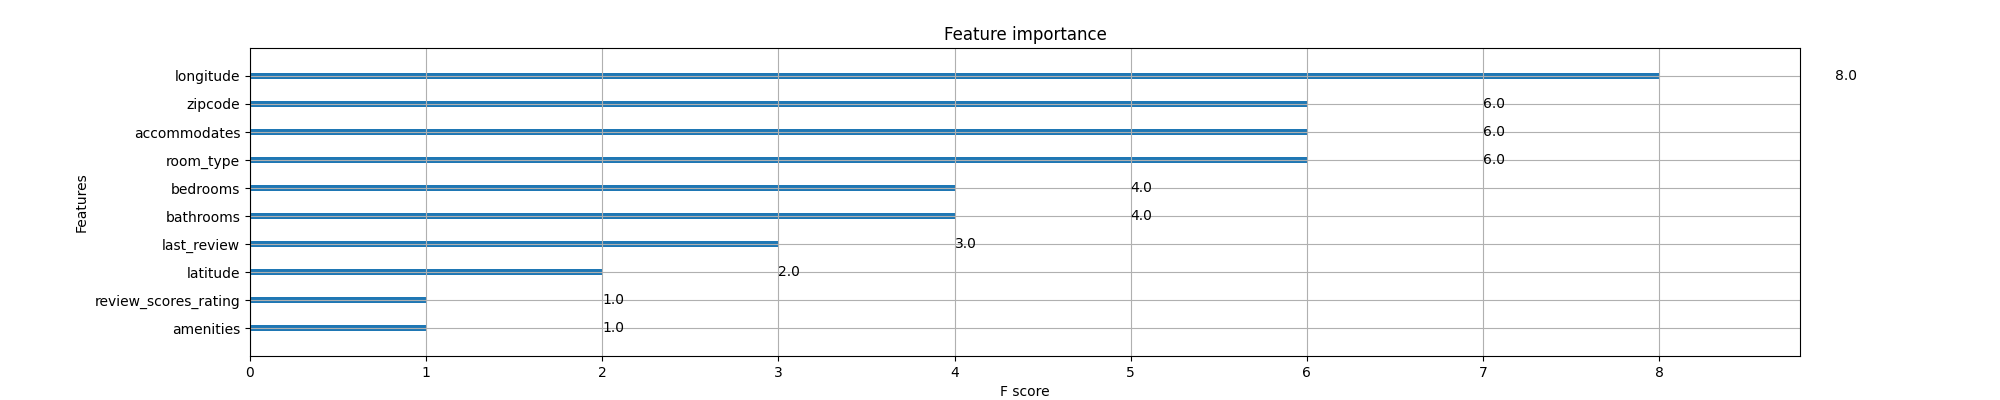

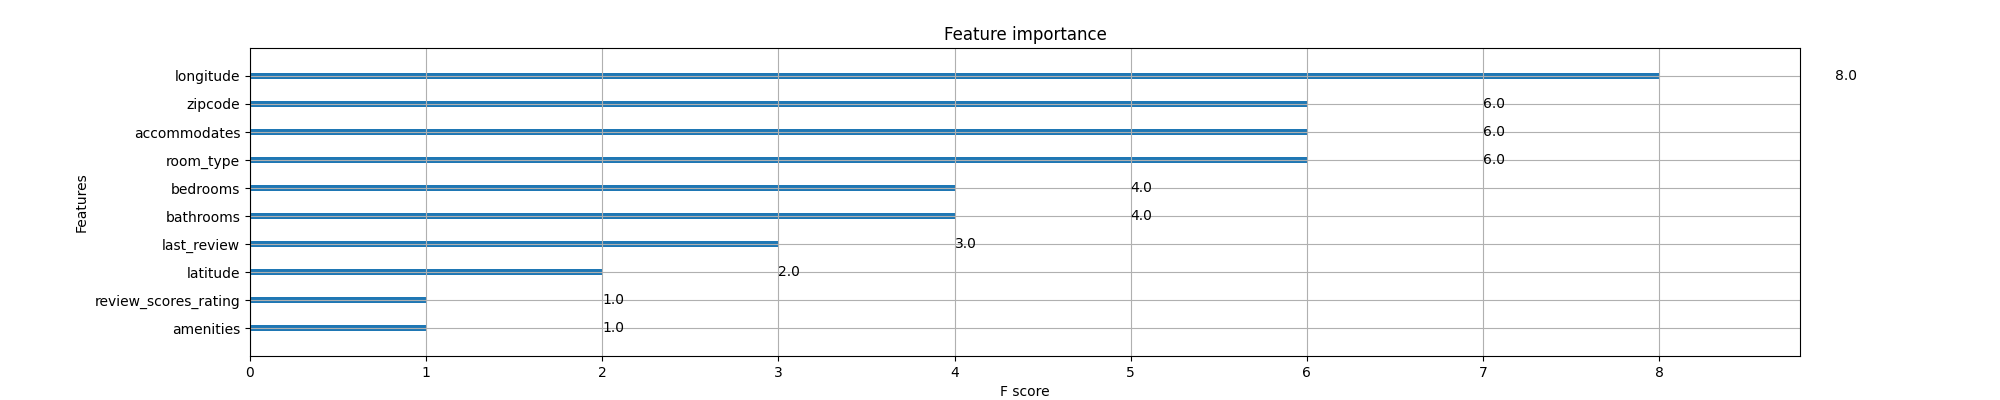

In [206]:
xgb.plot_importance(xgb_reg_train)
plt.rcParams['figure.figsize'] = [10, 4]
plt.show()